In [1]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,4]]
data.rename(columns={'low':'close'}, inplace=True)

from talib import RSI
data['rsi'] = RSI(data['close'])

## Lagged price

In [2]:
data['future_price_1'] = data['close'].shift(1)
data['future_price_2'] = data['close'].shift(2)
data['future_price_3'] = data['close'].shift(3)

data.dropna(axis=0, inplace=True)

In [3]:
input = data.iloc[:, [3,4,5]]
target = data.iloc[:, [1]]

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [5]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=1, shuffle=False)

In [6]:
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [7]:
# Make predictions on the testing data
y_pred = dt_regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 460.03884222633


In [8]:
y_test['pred'] = y_pred

In [9]:
y_test

close     pred
19490  1865.41  1864.91
19491  1867.11  1870.30
19492  1865.52  1872.81
19493  1863.20  1866.48
19494  1866.91  1859.89
...        ...      ...
24354  2438.64  2409.78
24355  2429.71  2522.37
24356  2424.75  2437.08
24357  2424.22  2388.97
24358  2433.89  2429.44

[4869 rows x 2 columns]

In [10]:
y_test.to_excel('deneme1.xlsx', index=False)

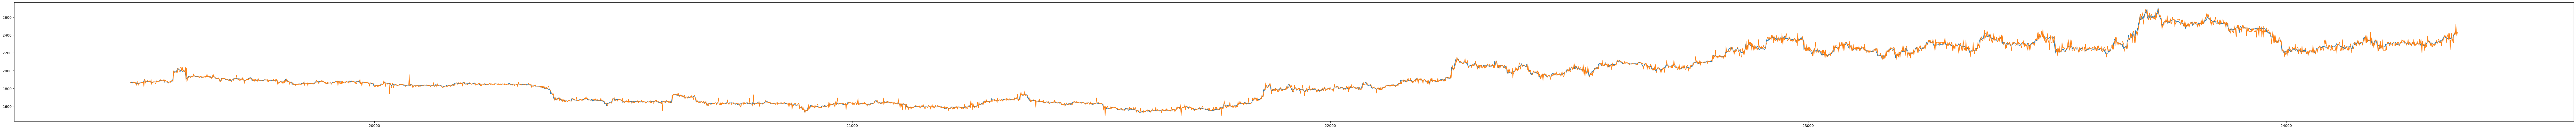

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(128, 6))

#y_test.close.plot()
#y_test.pred.plot()

plt.plot(y_test.close)
plt.plot(y_test.pred)
plt.savefig('deneme1_fig.png')

In [12]:
plt.savefig('deneme1_fig.png')

<Figure size 640x480 with 0 Axes>

## Lagged RSI

In [13]:
import pandas as pd

data2 = pd.read_csv('data_sample_three_years.csv')

data2 = data2.iloc[:, [0,3]]
data2.rename(columns={'high':'close'}, inplace=True)

from talib import RSI
data2['rsi'] = RSI(data2['close'])

In [14]:
data2['future_rsi_1'] = data2['rsi'].shift(1)
data2['future_rsi_2'] = data2['rsi'].shift(2)
data2['future_rsi_3'] = data2['rsi'].shift(3)

data2.dropna(axis=0, inplace=True)

In [15]:
input2 = data2.iloc[:, [3,4,5]]
target2 = data2.iloc[:, [2]]

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train2, X_test2, y_train2, y_test2 = train_test_split(input2, target2, test_size=0.2, random_state=1, shuffle=False)

dt_regressor2 = DecisionTreeRegressor(random_state=1)
dt_regressor2.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=1)

In [17]:
# Make predictions on the testing data
y_pred2 = dt_regressor2.predict(X_test2)

# Evaluate the model using mean squared error (MSE)
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)

Mean Squared Error: 48.69836276565037


In [18]:
y_test2['pred'] = y_pred2

In [19]:
y_test2.to_excel('deneme2.xlsx', index=False)

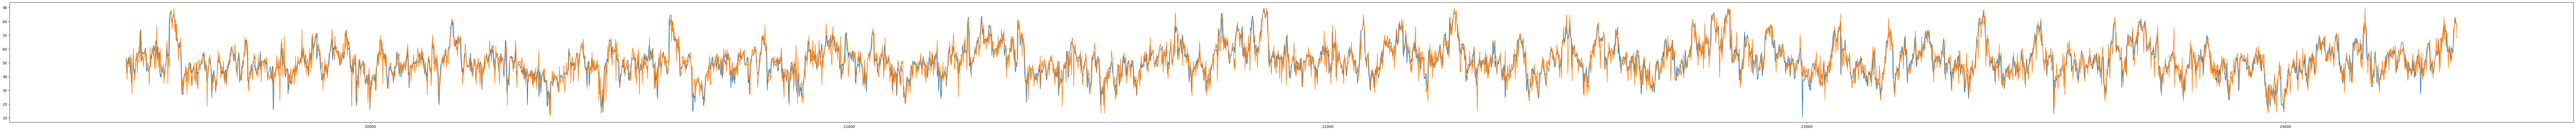

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(128, 6))

y_test2.rsi.plot()
y_test2.pred.plot()
plt.savefig('deneme2_fig.png')

## Lagged RSI: last 10 bar

In [21]:
import pandas as pd

data3 = pd.read_csv('data_sample_three_years.csv')

data3 = data3.iloc[:, [0,3]]
data3.rename(columns={'high':'close'}, inplace=True)

from talib import RSI
data3['rsi'] = RSI(data3['close'])

for i in range(1,11):
    data3[f'future_rsi_{i}'] = data3['rsi'].shift(i)


data3.dropna(axis=0, inplace=True)

input3 = data3.iloc[:, [3,4,5,6,7,8,9,10,11,12]]
target3 = data3.iloc[:, [2]]

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train3, X_test3, y_train3, y_test3 = train_test_split(input3, target3, test_size=0.2, random_state=1, shuffle=False)

dt_regressor3 = DecisionTreeRegressor(random_state=1)
dt_regressor3.fit(X_train3, y_train3)

DecisionTreeRegressor(random_state=1)

In [23]:
# Make predictions on the testing data
y_pred3 = dt_regressor3.predict(X_test3)

# Evaluate the model using mean squared error (MSE)
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)

Mean Squared Error: 50.14482316629784


In [24]:
y_test3['pred'] = y_pred3

In [25]:
y_test3.to_excel('deneme3.xlsx', index=False)

In [26]:
X_test3

future_rsi_1  future_rsi_2  future_rsi_3  future_rsi_4  future_rsi_5  \
19492     42.450793     52.572507     56.877506     53.768714     55.497695   
19493     50.164382     42.450793     52.572507     56.877506     53.768714   
19494     49.223664     50.164382     42.450793     52.572507     56.877506   
19495     49.630553     49.223664     50.164382     42.450793     52.572507   
19496     53.911989     49.630553     49.223664     50.164382     42.450793   
...             ...           ...           ...           ...           ...   
24354     78.251347     76.470780     73.621013     61.648557     56.987615   
24355     79.801442     78.251347     76.470780     73.621013     61.648557   
24356     81.156058     79.801442     78.251347     76.470780     73.621013   
24357     77.689871     81.156058     79.801442     78.251347     76.470780   
24358     77.896916     77.689871     81.156058     79.801442     78.251347   

       future_rsi_6  future_rsi_7  future_rsi_8  future_rsi_9  future_rsi_10  
19492     52.346153     56.252292     53.155483     55.309920      57.123900  
19493     55.497695     52.346153     56.252292     53.155483      55.309920  
19494     53.768714     55.497695     52.346153     56.252292      53.155483  
19495     56.877506     53.768714     55.497695     52.346153      56.252292  
19496     52.572507     56.877506     53.768714     55.497695      52.346153  
...             ...           ...           ...           ...            ...  
24354     57.755489     61.076036     58.176436     53.756117      52.837473  
24355     56.987615     57.755489     61.076036     58.176436      53.756117  
24356     61.648557     56.987615     57.755489     61.076036      58.176436  
24357     73.621013     61.648557     56.987615     57.755489      61.076036  
24358     76.470780     73.621013     61.648557     56.987615      57.755489  

[4867 rows x 10 columns]

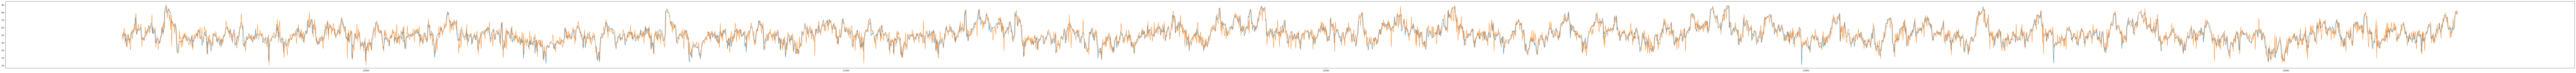

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(228, 6))

y_test3.rsi.plot()
y_test3.pred.plot()

plt.savefig('deneme3_fig.png')

## Lagged RSI to forecast 5th bar ahead: reuse

In [28]:
arr = y_test3.rsi[0:10].to_numpy().reshape(1,-1)
val = [arr[:, 0][0]]
for _ in range(len(y_test3)-10):
    #arr = y_test3.rsi[i:i+10].to_numpy().reshape(1,-1)
    pred = dt_regressor3.predict(arr)[0]
    val.append(pred)
    arr = np.append(arr[:, 1:], pred).reshape(1,-1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does